In [166]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [167]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

new_col_names = {
    "Serial No.": "Serial Number",
    "GRE Score": "GRE",
    "TOEFL Score": "TOEFL",
    "University Rating": "University_Rating",
    "SOP": "Statement_of_Purpose",
    "LOR ": "Letter_of_Recommendation",
    "CGPA": "CGPA_Score",
    "Research": "Research_Experience",
    "Chance of Admit ": "Admission_Chance"
}

# renaming
df = df.rename(columns=new_col_names)

df.head()

,Serial Number,GRE,TOEFL,University_Rating,Statement_of_Purpose,Letter_of_Recommendation,CGPA_Score,Research_Experience,Admission_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [168]:
df.dtypes

Serial Number                 int64
GRE                           int64
TOEFL                         int64
University_Rating             int64
Statement_of_Purpose        float64
Letter_of_Recommendation    float64
CGPA_Score                  float64
Research_Experience           int64
Admission_Chance            float64
dtype: object

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
Statement_of_Purpose,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
Letter_of_Recommendation,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA_Score,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research_Experience,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Admission_Chance,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [170]:
px.imshow(df.corr(),title="Correlation Plot of Graduate Admission")

[]

<Figure size 1500x1000 with 0 Axes>

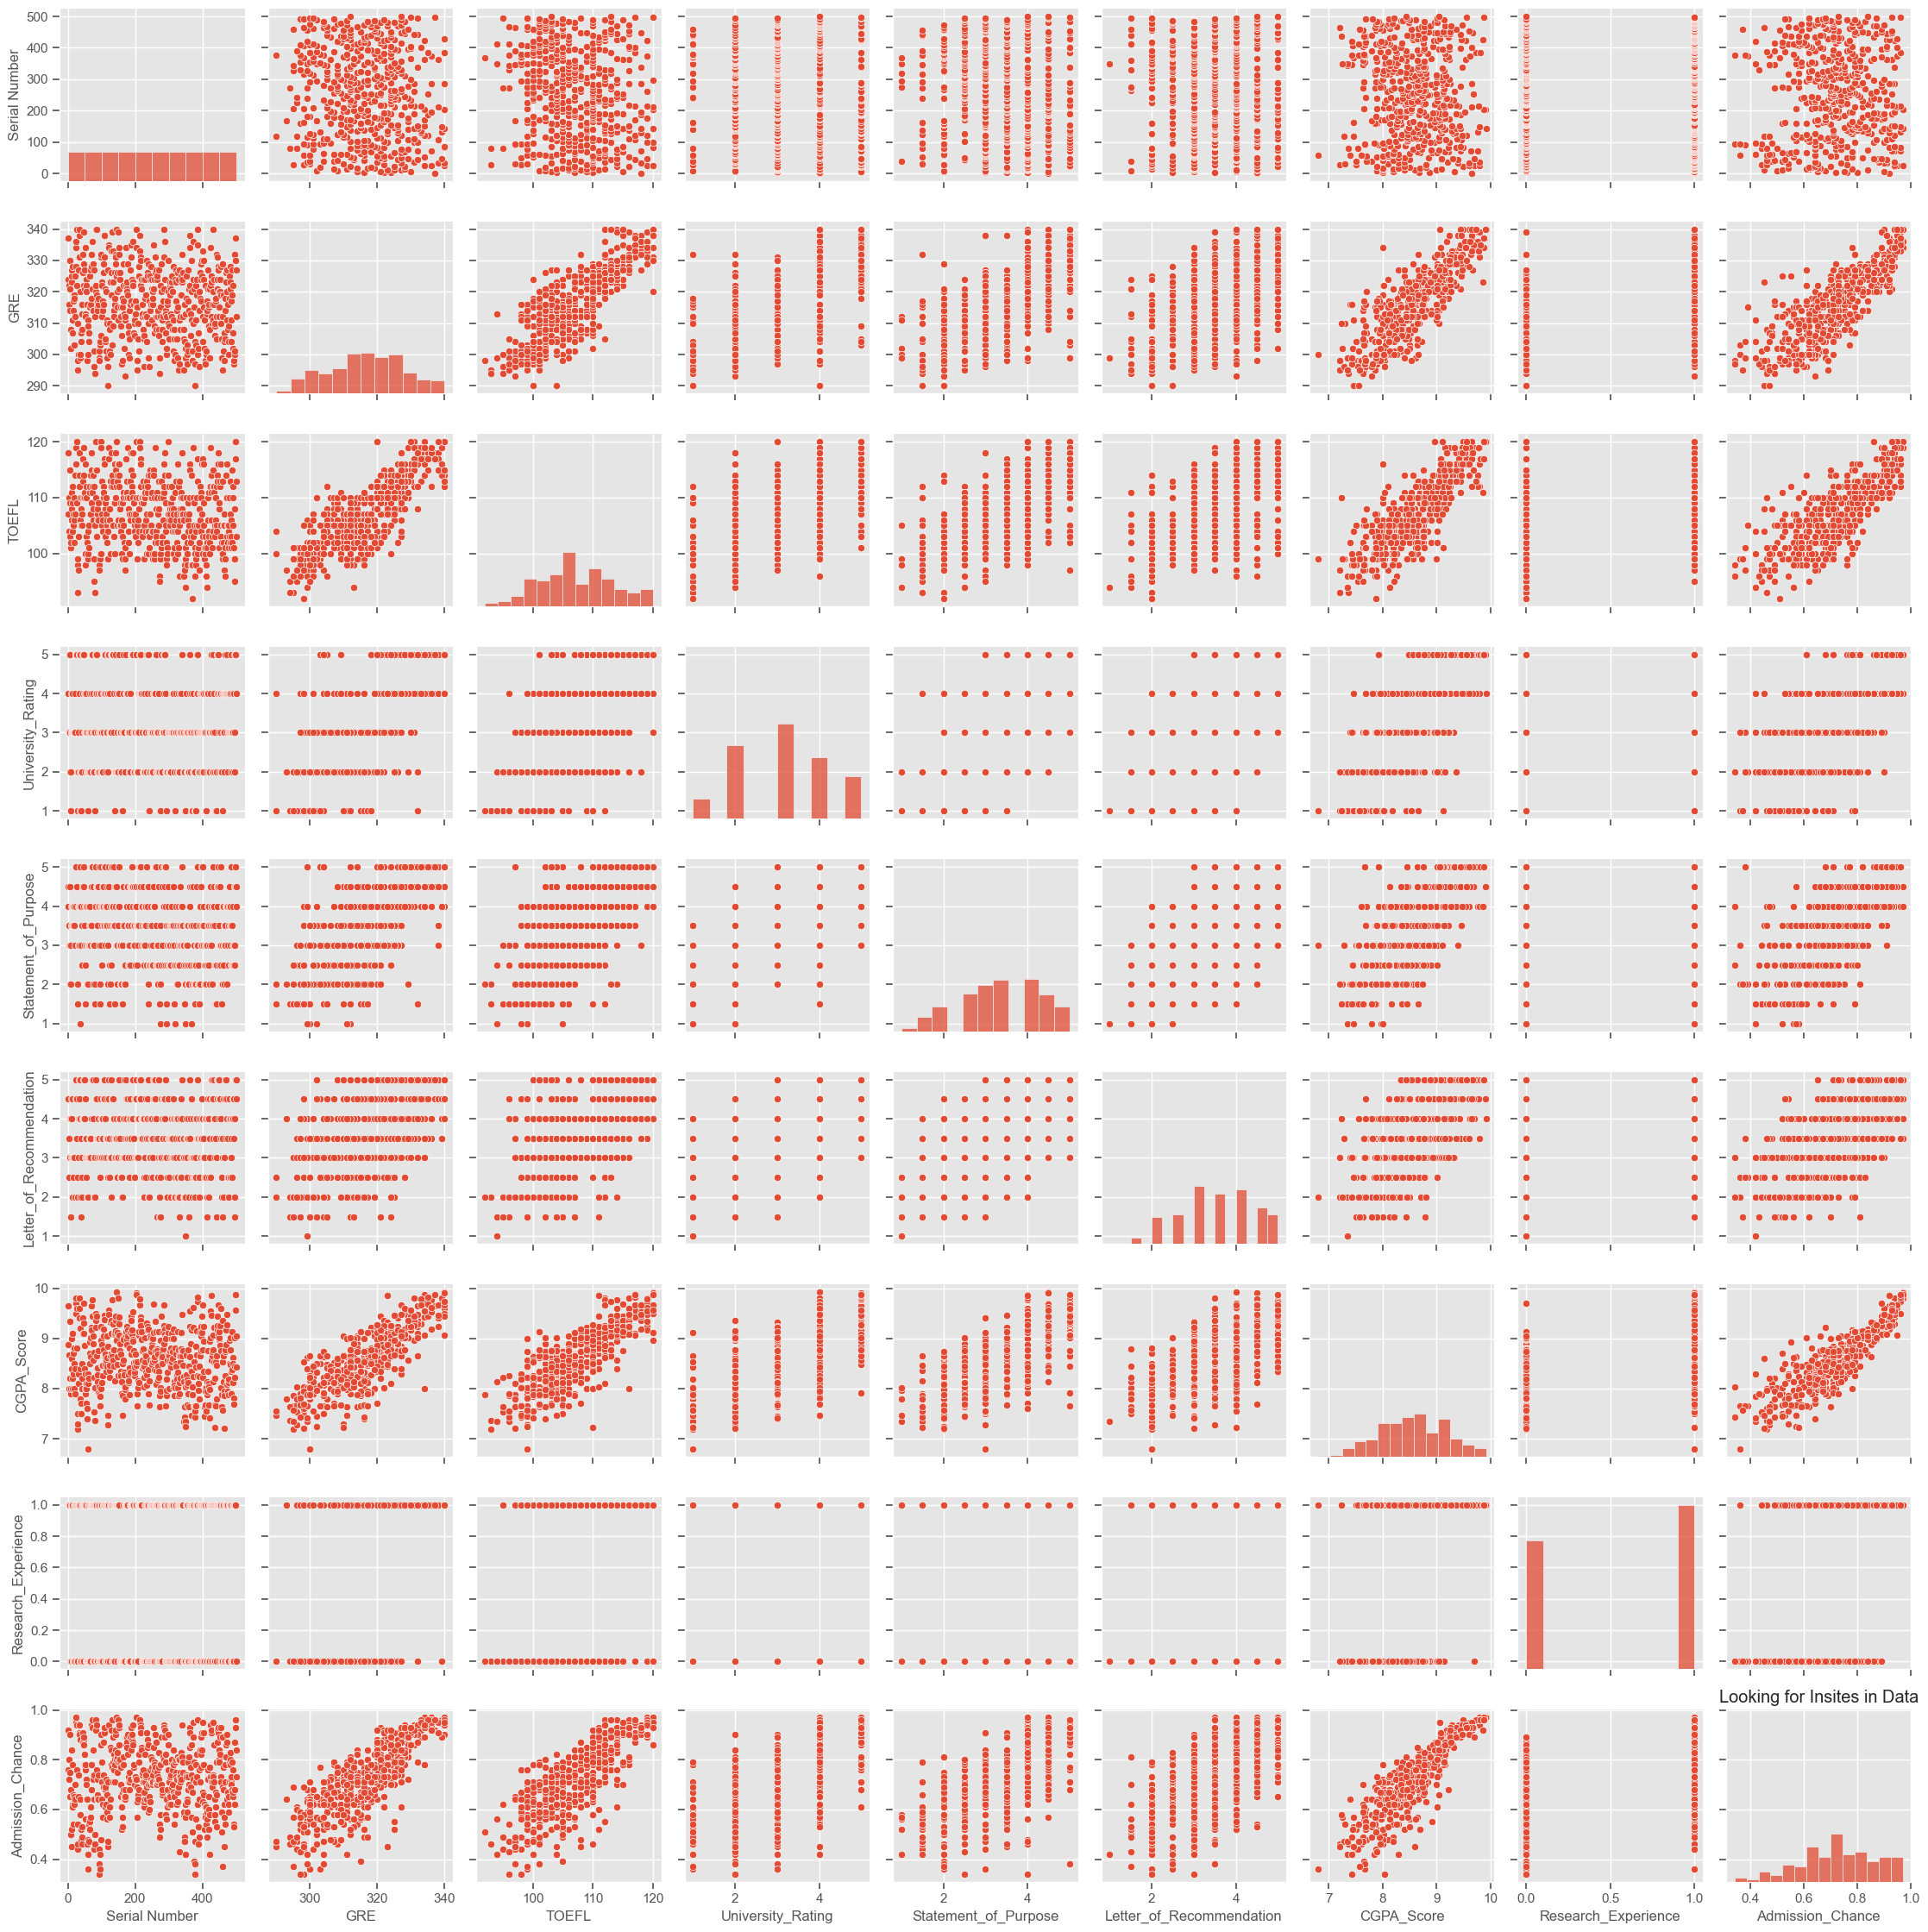

In [171]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.plot()

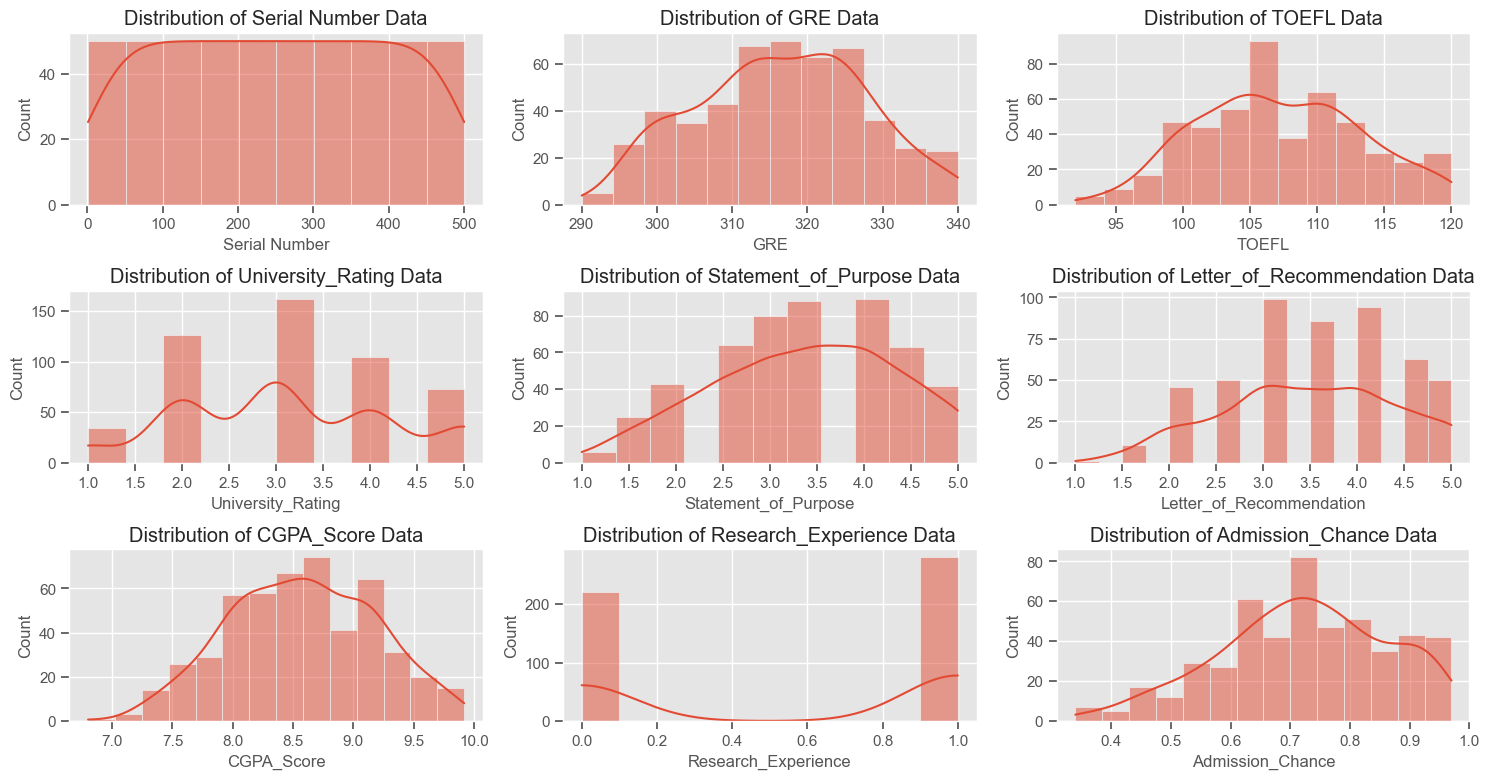

In [172]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [173]:
fig = px.box(df,y="GRE",title=f"Distrubution of GRE Score")
fig.show()

In [174]:
fig = px.box(df,y="TOEFL",title=f"Distrubution of TOEFL")
fig.show()

In [175]:
fig = px.box(df,y="University_Rating",title=f"Distrubution of University_Rating")
fig.show()

In [176]:
fig = px.box(df,y="Statement_of_Purpose",title=f"Distrubution of Statement_of_Purpose")
fig.show()

In [177]:
fig = px.box(df,y="Letter_of_Recommendation",title=f"Distrubution of Letter_of_Recommendation")
fig.show()

In [178]:
fig = px.box(df,y="CGPA_Score",title=f"Distrubution of CGPA_Score")
fig.show()

In [179]:
fig = px.box(df,y="Research_Experience",title=f"Distrubution of Research_Experience")
fig.show()

In [180]:
fig = px.box(df,y="Admission_Chance",title=f"Distrubution of Admission_Chance")
fig.show()

In [181]:
import statsmodels.formula.api as smf
formula = 'Admission_Chance' + '~ GRE + TOEFL + CGPA_Score'

# Generate linear regression model using Least Squares method   
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Admission_Chance   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     680.9
Date:                Sat, 06 May 2023   Prob (F-statistic):          2.21e-175
Time:                        14:40:25   Log-Likelihood:                 678.23
No. Observations:                 500   AIC:                            -1348.
Df Residuals:                     496   BIC:                            -1332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5968      0.091    -17.566      0.0

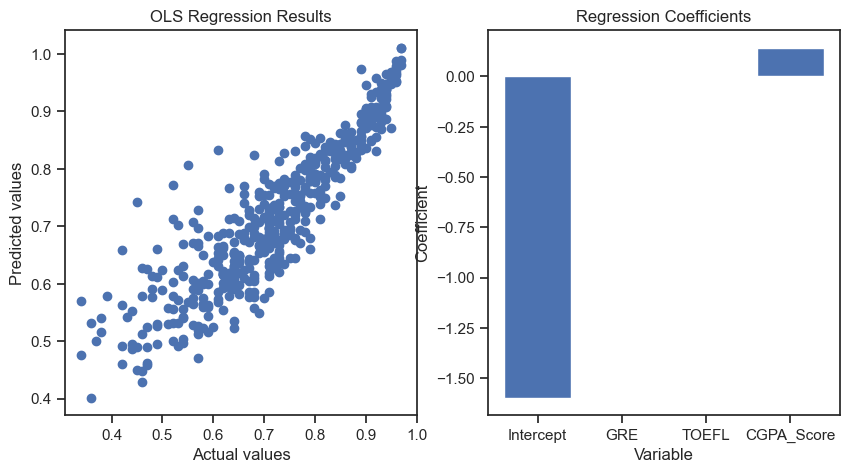

In [185]:
import numpy as np

# вхідні дані
x = df["Admission_Chance"]
y = model.predict()

# відображення діаграми розсіювання та лінії регресії
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("OLS Regression Results")
plt.show()


In [ ]:
print(model.conf_int(alpha=0.05))

                   0         1
Intercept  -1.775412 -1.418207
GRE         0.001368  0.003336
TOEFL       0.001440  0.004958
CGPA_Score  0.125947  0.161201


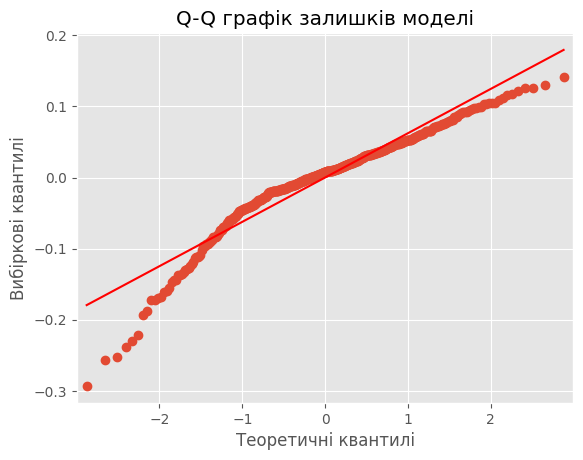

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

residuals = model.resid

# Побудова Q-Q графіка
fig = sm.qqplot(residuals, line='s')
fig.axes[0].set_title('Q-Q графік залишків моделі')
fig.axes[0].set_xlabel('Теоретичні квантилі')
fig.axes[0].set_ylabel('Вибіркові квантилі')
plt.show()

In [ ]:
kstest = stats.shapiro(residuals)
print('KS test statistics:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistics: 0.9292690753936768
KS test p-value: 0.00000


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Define the independent and dependent variables
X = df[['GRE', 'TOEFL', 'CGPA_Score']]
y = df['Admission_Chance']

# Create the ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Use the model to make predictions on the data
y_pred = ridge_model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared: ", r2)

R-squared:  0.8045758645970167


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = model.resid

p_value, _, _, _ = het_breuschpagan(residuals, X)
print(f'Breusch-Pagan test p-value: {p_value}')

Breusch-Pagan test p-value: 15.339776107128223


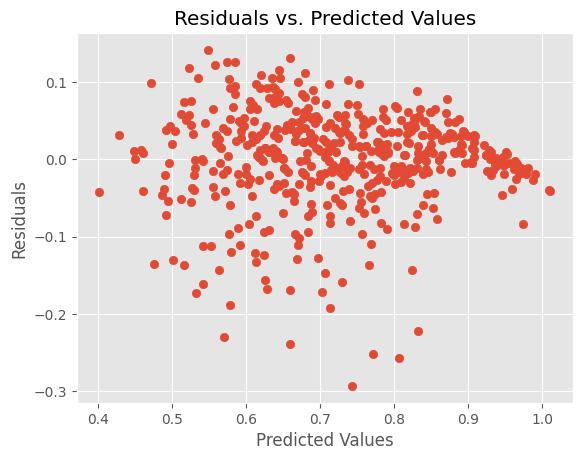

In [ ]:
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

# Define the independent and dependent variables
X = df[['GRE', 'TOEFL', 'CGPA_Score']]
y = df['Admission_Chance']

# Create the Huber regression model
huber_model = HuberRegressor(epsilon=1.35)
huber_model.fit(X, y)

# Use the model to make predictions on the data
y_pred = huber_model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared: ", r2)

R-squared:  0.8015414990800339


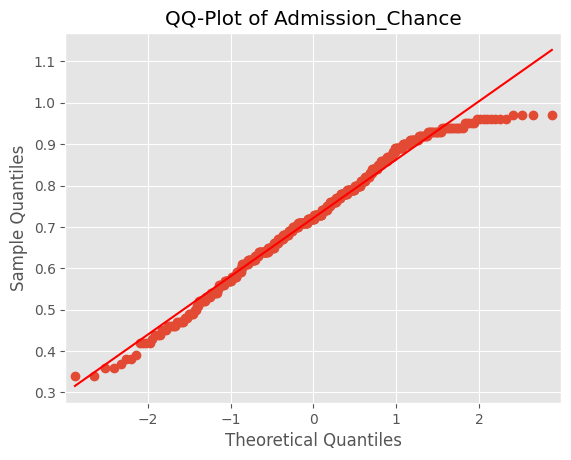

In [ ]:
import statsmodels.api as sm

fig = sm.qqplot(df["Admission_Chance"], line='s')
plt.title("QQ-Plot of Admission_Chance")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df["Admission_Chance"])
print('KS test statistics:', stat)
print('KS test p-value: {:.5f}'.format(p))

KS test statistics: 0.9802490472793579
KS test p-value: 0.00000


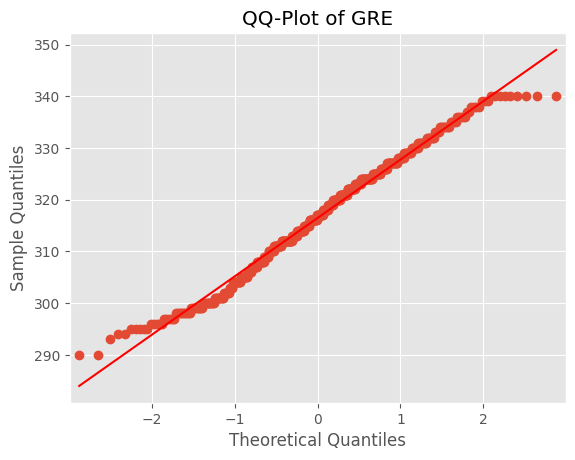

In [ ]:
fig = sm.qqplot(df["GRE"], line='s')
plt.title("QQ-Plot of GRE")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

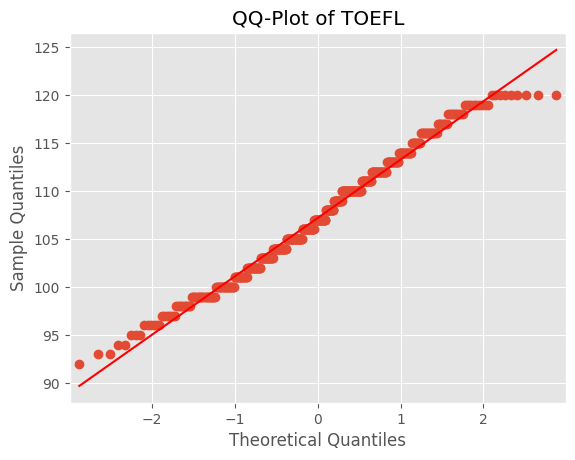

In [ ]:
fig = sm.qqplot(df["TOEFL"], line='s')
plt.title("QQ-Plot of TOEFL")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [ ]:
kstest = stats.kstest(df["TOEFL"], 'norm')
print('KS test statistics:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistics: 1.0
KS test p-value: 0.00000


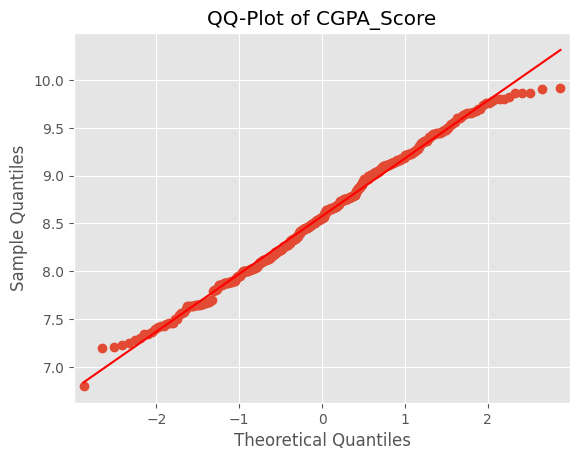

In [ ]:
fig = sm.qqplot(df["CGPA_Score"], line='s')
plt.title("QQ-Plot of CGPA_Score")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [ ]:
kstest = stats.kstest(df["CGPA_Score"], 'norm')
print('KS test statistics:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistics: 0.9999999999947691
KS test p-value: 0.00000


In [ ]:
import scipy.stats as stats

corr, p_val = stats.pearsonr(df["Admission_Chance"], df["GRE"])

print(f"Коефіцієнт кореляції: {corr}")
print(f"p-значення: {p_val}")

Коефіцієнт кореляції: 0.81035063546326
p-значення: 1.0884036862475046e-117


In [ ]:
corr, p_val = stats.pearsonr(df["Admission_Chance"], df["TOEFL"])

print(f"Коефіцієнт кореляції: {corr}")
print(f"p-значення: {p_val}")

Коефіцієнт кореляції: 0.792227614305083
p-значення: 6.729926762328514e-109


In [ ]:
corr, p_val = stats.pearsonr(df["Admission_Chance"], df["CGPA_Score"])

print(f"Коефіцієнт кореляції: {corr}")
print(f"p-значення: {p_val}")

Коефіцієнт кореляції: 0.8824125749045744
p-значення: 3.3965448587106127e-165


In [ ]:
X = np.column_stack((df["GRE"], df["TOEFL"], df["CGPA_Score"]))

Y = X.T @ X
print(np.linalg.det(Y))

19044531641815.527


In [ ]:
# Визначення залежної та незалежних змінних
y = df['Admission_Chance']
X = df[['GRE', 'TOEFL', 'CGPA_Score']]

# Додавання стовпця з константою для оцінки розміщення перетину
X = sm.add_constant(X)

# Підрахунок VIF для кожної незалежної змінної
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [sm.OLS(X[col].values, X.drop(col, axis=1).values).fit().rsquared for col in X.columns]

print(vif)

    variables       VIF
0       const  0.999052
1         GRE  0.754646
2       TOEFL  0.735318
3  CGPA_Score  0.733486
